<a href="https://colab.research.google.com/github/mahi97/MahiColabs/blob/master/BasicRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gym
!pip install git+https://github.com/mrahtz/gym-moving-dot

  Cloning https://github.com/mrahtz/gym-moving-dot to /tmp/pip-req-build-aakjaflk
  Running command git clone -q https://github.com/mrahtz/gym-moving-dot /tmp/pip-req-build-aakjaflk
  Created wheel for gym-moving-dot: filename=gym_moving_dot-2.0-cp36-none-any.whl size=4166 sha256=2ae427799efb6f92d478a457da5cb18e56e5d0e36fc19e4b5e8df8424e735937
  Stored in directory: /tmp/pip-ephem-wheel-cache-i4zs1xfi/wheels/2e/39/44/75a6ae7a5f83ccbaeabf1a5171e481e4384e37c4b45a0473f4
Successfully built gym-moving-dot


In [0]:
import numpy as np
np.argmax([1,20,3,4])
a= [1,2,3,4]
a[3]

4

Define Model

In [0]:
import tensorflow as tf
import numpy as np
import random

def weight_variable(shape):
    '''Helper function to create a weight variable initialized with a normal distribution 
    Parameters
    ----------
    shape : list
        Size of weight variable
    '''
    initial = tf.random_normal(shape, mean=0.0, stddev=0.01, dtype=tf.float64)
    return tf.Variable(initial)


# %%
def bias_variable(shape):
    '''Helper function to create a bias variable initialized with a constant value.
    Parameters
    ----------
    shape : list
        Size of weight variable
    '''
    initial = tf.random_normal(shape, mean=0.0, stddev=0.01, dtype=tf.float64)
    return tf.Variable(initial)

def MSE(yHat, y):
    return tf.reduce_sum(tf.pow(yHat - y,2))

# Model
x = tf.placeholder(tf.float64, [None, 2])
y = tf.placeholder(tf.float64, [None, 1])

# w1 = weight_variable([2,2])
# b1 = bias_variable([2])
# w2 = weight_variable([5,3])
# b2 = bias_variable([3])

w_act = [weight_variable([2,1]) for _ in range(5)]
b_act = [bias_variable([1]) for _ in range(5)]

# f1 = tf.matmul(x, w1) + b1
# f2 = tf.matmul(f1, w2) + b2
out_act = [(tf.matmul(x, w_act[i]) + b_act[i]) for i in range(5)]

cost = [MSE(y,out_act[i]) for i in range(5)]
# Optimizer
learning_rate = 0.001
optimizer = [tf.train.AdamOptimizer(learning_rate).minimize(cost[i]) for i in range(5)]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train and Test

In [0]:
import gym
import gym_moving_dot
from pprint import pprint

env = gym.make('MovingDotDiscrete-v0')
env.random_start = False

sess = tf.Session()
sess.run(tf.global_variables_initializer())


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:
def one_shot(act):
  a = [0 for i in range(5)]
  a[act] = 1
  return a

In [0]:
def get_pos(obs):
  for i, oo in enumerate(obs):
    for j, ooo in enumerate(oo):
      if ooo[0] == 255:
        return (i,j)
  return (-1,-1)

def nodel(pos,act):
  return sess.run(out_act[act], feed_dict={x: np.array([pos[0], pos[1]]).reshape(1,2)})[0][0]

def one_shot(act):
  a = [0 for i in range(5)]
  a[act] = 1
  return a
# LOOP
env.random_start = True

# 1. gather data by Model/Random
data_r = []
def expriment():
  data_x = [[] for _ in range(5)]
  data_y = [[] for _ in range(5)]
  data_a = [[] for _ in range(5)]
  rrr = []
  num_batch = 1
  num_iter = 200
  expl_expr = 0.2
  for i in range(num_batch):
    # print('EXPRIMET: {}'.format(i))
    o = env.reset()
    a = env.action_space.sample()
    pos = get_pos(o)
    for j in range(num_iter):
      o, r, d, info = env.step(a)
      data_x[a].append(((pos[0]-105)/2,(pos[1]-80)/2))
      rrr.append(r)
      data_y[a].append(r)
      pos = get_pos(o)
      if j == 1:
         print(pos)
      r = [nodel(((pos[0]-105)/2,(pos[1]-80)/2),act) for act in range(env.action_space.n)]
      if random.random() > expl_expr:
        a = np.argmax(r)
      else:
        a = env.action_space.sample()
      data_a[a].append(1)
  print([sum(d) for d in data_a])
  data_r.append(sum(rrr))
  return data_x, data_y

# print(data_x)
# print(data_y)
data_f = [[] for _ in range(5)]

In [0]:
def train():
  n_epochs = 30
  for epoch_i in range(n_epochs):
    data_x, data_y = expriment()
    print(epoch_i)
    for i in range(5):
      sess.run(optimizer[i], feed_dict={x: data_x[i], y: np.array(data_y[i]).reshape(-1,1)})
      data_f[i].append(sess.run(cost[i], feed_dict={x: data_x[i], y: np.array(data_y[i]).reshape(-1,1)}))

In [0]:
# 2. Train Model

train()

(134, 120)
[3, 45, 17, 76, 59]
0
(79, 72)
[14, 92, 17, 67, 10]
1
(24, 153)
[5, 95, 5, 15, 80]
2
(204, 146)
[9, 8, 10, 102, 71]
3
(131, 63)
[6, 61, 30, 89, 14]
4
(66, 154)
[9, 70, 6, 33, 82]
5
(126, 59)
[7, 68, 27, 91, 7]
6
(28, 20)
[6, 97, 68, 20, 9]
7
(81, 149)
[8, 61, 10, 39, 82]
8
(110, 85)
[8, 79, 10, 86, 17]
9
(127, 21)
[5, 44, 71, 68, 12]
10
(36, 61)
[2, 117, 25, 49, 7]
11
(7, 58)
[9, 128, 27, 31, 5]
12
(157, 154)
[9, 16, 14, 71, 90]
13
(178, 76)
[8, 44, 15, 121, 12]
14
(30, 85)
[8, 113, 16, 41, 22]
15
(189, 66)
[4, 33, 27, 121, 15]
16
(154, 19)
[9, 28, 71, 80, 12]
17
(52, 41)
[15, 90, 46, 40, 9]
18
(156, 137)
[4, 34, 8, 87, 67]
19
(1, 37)
[8, 122, 47, 18, 5]
20
(156, 89)
[12, 55, 8, 107, 18]
21
(51, 74)
[3, 113, 15, 59, 10]
22
(126, 18)
[11, 46, 68, 69, 6]
23
(161, 137)
[13, 21, 14, 79, 73]
24
(2, 63)
[6, 129, 27, 27, 11]
25
(70, 90)
[5, 93, 16, 59, 27]
26
(14, 96)
[9, 124, 8, 34, 25]
27
(128, 107)
[6, 11, 59, 36, 88]
28
(183, 57)
[8, 15, 52, 96, 29]
29


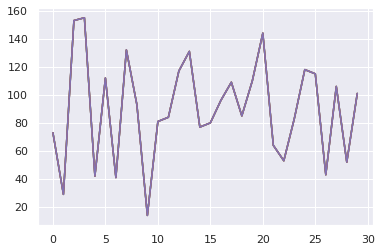

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(5):
  plt.plot(range(len(data_r)),data_r)



In [0]:
maps = [[[nodel(((x-26)/2,(y-20)/2),a) for y in range(40)] for x in range(52)] for a in range(5)]

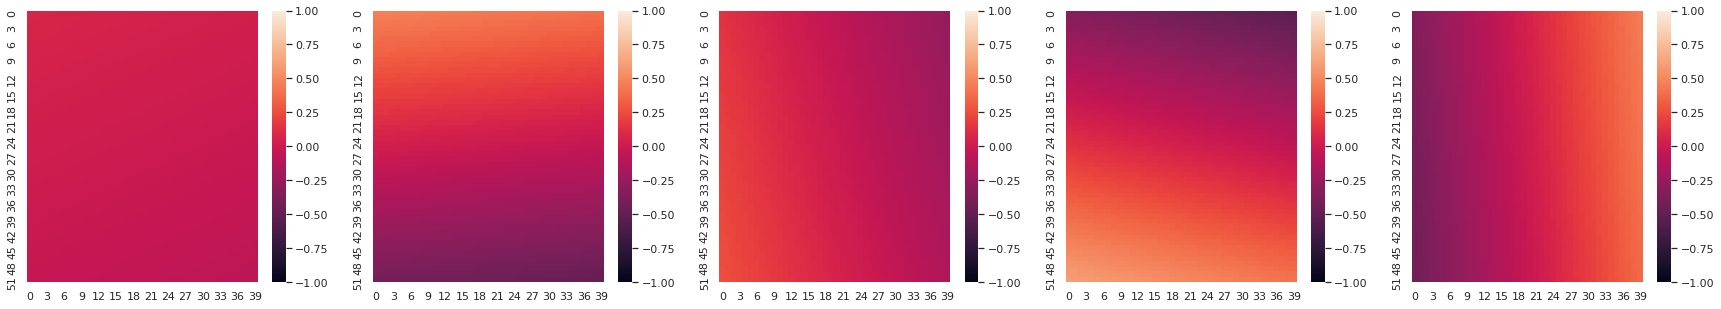

In [0]:
import seaborn as sns; sns.set()
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)
sns.heatmap(maps[0],vmin=-1, vmax=1, ax=ax1)
sns.heatmap(maps[1],vmin=-1, vmax=1, ax=ax2)
sns.heatmap(maps[2],vmin=-1, vmax=1, ax=ax3)
sns.heatmap(maps[3],vmin=-1, vmax=1, ax=ax4)
sns.heatmap(maps[4],vmin=-1, vmax=1, ax=ax5)


In [0]:

# 3. Evaluate Expriment
test_num = 1
max_iter = 200

rewards = []
for i in range(test_num):
  o = env.reset()
  pos = get_pos(o)
  rewards.append([])
  for _ in range(max_iter):
    r = [nodel(((pos[0]-105)/2,(pos[1]-80)/2),act) for act in range(env.action_space.n)]
    a = np.argmax(r)
    print(pos, r,a)
    o, r, d, info = env.step(a)
    pos = get_pos(o)
    rewards[i].append(r)
    
final = [sum(i) for i in rewards]
print(final)
print("Avg: {}".format(sum([i/len(final) for i in final])))

(17, 52) [0.20878213693432887, 1.5388285370989625, 0.07616113278136495, -1.4157467590578992, -0.401656229046309] 1
(18, 52) [0.20675986628532853, 1.5218204266103057, 0.07855647990365029, -1.3975075979526623, -0.4033239515889111] 1
(19, 52) [0.20473759563632818, 1.5048123161216491, 0.08095182702593563, -1.3792684368474253, -0.4049916741315132] 1
(20, 52) [0.2027153249873278, 1.4878042056329923, 0.08334717414822095, -1.3610292757421882, -0.40665939667411527] 1
(21, 52) [0.20069305433832746, 1.4707960951443357, 0.08574252127050629, -1.3427901146369512, -0.4083271192167174] 1
(22, 52) [0.19867078368932709, 1.453787984655679, 0.08813786839279163, -1.3245509535317144, -0.4099948417593195] 1
(23, 52) [0.19664851304032674, 1.4367798741670224, 0.09053321551507694, -1.3063117924264773, -0.41166256430192155] 1
(24, 52) [0.1946262423913264, 1.4197717636783656, 0.09292856263736228, -1.2880726313212403, -0.41333028684452366] 1
(25, 52) [0.19260397174232602, 1.4027636531897087, 0.09532390975964762, -